In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from numpy.random import multivariate_normal,permutation
import pandas as pd
from pandas import DataFrame, Series

np.random.seed(20160614)
tf.set_random_seed(20160614)

%config IPCompleter.greedy=True
%matplotlib inline
%matplotlib notebook

/Users/yamamotomasaomi/.pyenv/versions/anaconda3-5.1.0/envs/makuwo/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


In [2]:
def generate_datablock(n, mu, var, t):
    data = multivariate_normal(mu, np.eye(2)*var, n)
    df = DataFrame(data, columns=['x1','x2'])
    df['t'] = t
    return df
df0 = generate_datablock(15,[7,7],22,0)
df1 = generate_datablock(15,[22,7],22,0)
df2 = generate_datablock(10,[7,22],22,0)
df3 = generate_datablock(25,[20,20],22,1)

df = pd.concat([df0,df1,df2,df3], ignore_index=True)
train_set = df.reindex(permutation(df.index)).reset_index(drop=True)

In [3]:
train_x = train_set[['x1','x2']].as_matrix()
train_t = train_set['t'].as_matrix().reshape([len(train_set),1])

In [4]:
num_units = 4
mult = train_x.flatten().mean()

x = tf.placeholder(tf.float32,[None,2])

w1 = tf.Variable(tf.truncated_normal([2,num_units]))
b1 = tf.Variable(tf.zeros([num_units]))
hidden1 = tf.nn.tanh(tf.matmul(x, w1) + b1*mult)

w0 = tf.Variable(tf.zeros([num_units, 1]))
b0 = tf.Variable(tf.zeros([1]))
p = tf.nn.sigmoid(tf.matmul(hidden1, w0) + b0*mult)

In [5]:
t = tf.placeholder(tf.float32,[None, 1])
loss = -tf.reduce_sum(t*tf.log(p) + (1-t)*tf.log(1-p))
train_step = tf.train.GradientDescentOptimizer(0.0005).minimize(loss)
correct_prediction = tf.equal(tf.sign(p-0.5),tf.sign(t-0.5))
accuracy = accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [6]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [7]:
i = 0
for _ in range(4000):
    i += 1
    sess.run(train_step, feed_dict={x:train_x, t:train_t})
    if i % 100 == 0:
        loss_val, acc_val = sess.run([loss,accuracy],feed_dict={x:train_x,t:train_t})
        print ('Step:%d Loss:%f, Accuracy:%f' % (i, loss_val, acc_val))

Step:100 Loss:42.306732, Accuracy:0.615385
Step:200 Loss:35.429836, Accuracy:0.615385
Step:300 Loss:29.520407, Accuracy:0.830769
Step:400 Loss:23.003967, Accuracy:0.892308
Step:500 Loss:17.963150, Accuracy:0.938462
Step:600 Loss:14.951723, Accuracy:0.938462
Step:700 Loss:12.873066, Accuracy:0.938462
Step:800 Loss:11.512395, Accuracy:0.953846
Step:900 Loss:10.482079, Accuracy:0.969231
Step:1000 Loss:10.254847, Accuracy:0.969231
Step:1100 Loss:9.647793, Accuracy:0.969231
Step:1200 Loss:9.084059, Accuracy:0.969231
Step:1300 Loss:8.513965, Accuracy:0.969231
Step:1400 Loss:7.934921, Accuracy:0.969231
Step:1500 Loss:7.423864, Accuracy:0.984615
Step:1600 Loss:6.993739, Accuracy:0.984615
Step:1700 Loss:6.576995, Accuracy:0.984615
Step:1800 Loss:6.151159, Accuracy:0.984615
Step:1900 Loss:5.817125, Accuracy:0.984615
Step:2000 Loss:5.582230, Accuracy:0.984615
Step:2100 Loss:5.404065, Accuracy:0.984615
Step:2200 Loss:5.260813, Accuracy:0.984615
Step:2300 Loss:5.135258, Accuracy:0.984615
Step:2400 

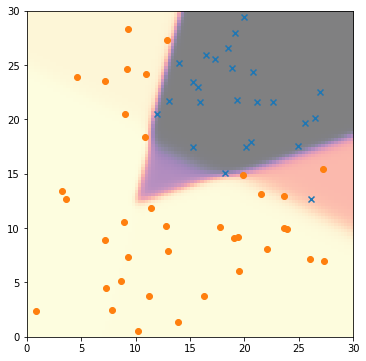

In [10]:
train_set1 = train_set[train_set['t']==1]
train_set2 = train_set[train_set['t']==0]

fig = plt.figure(figsize=(6,6))
subplot = fig.add_subplot(1,1,1)
subplot.set_ylim([0,30])
subplot.set_xlim([0,30])
subplot.scatter(train_set1.x1, train_set1.x2, marker='x')# これはxでないと使えないらしい
subplot.scatter(train_set2.x1, train_set2.x2, marker='o')#　同様にこちらもo

localtions = []
for x2 in np.linspace(0,30,100):
    for x1 in np.linspace(0,30,100):
        localtions.append((x1,x2))
p_vals = sess.run(p, feed_dict={x:localtions})
p_vals = p_vals.reshape((100,100))
subplot.imshow(p_vals, origin='lower', extent=(0,30,0,30),cmap="magma_r", alpha=0.5)